In [1]:
import pandas  as pd
df=pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


#EDA

In [3]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


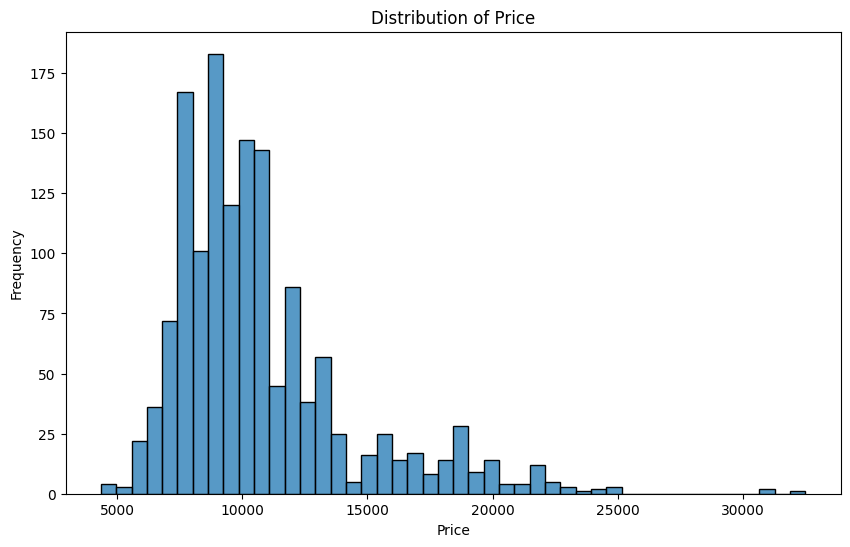

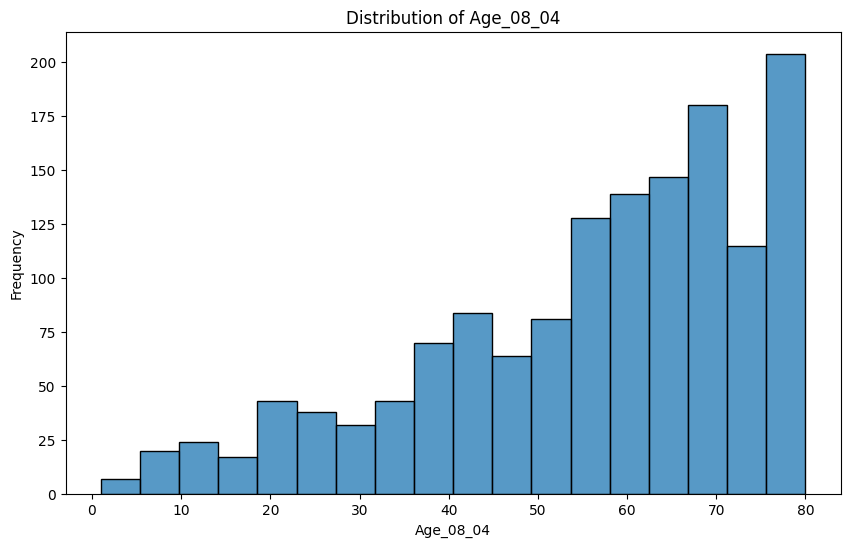

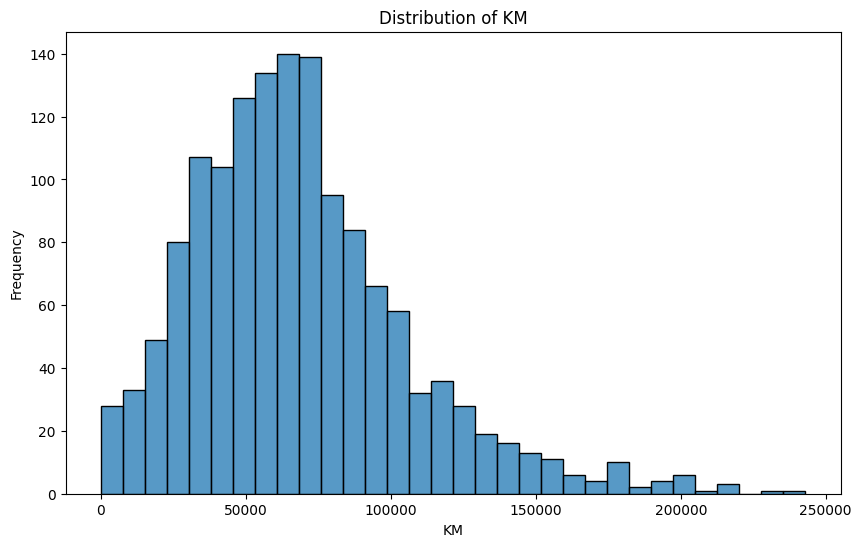

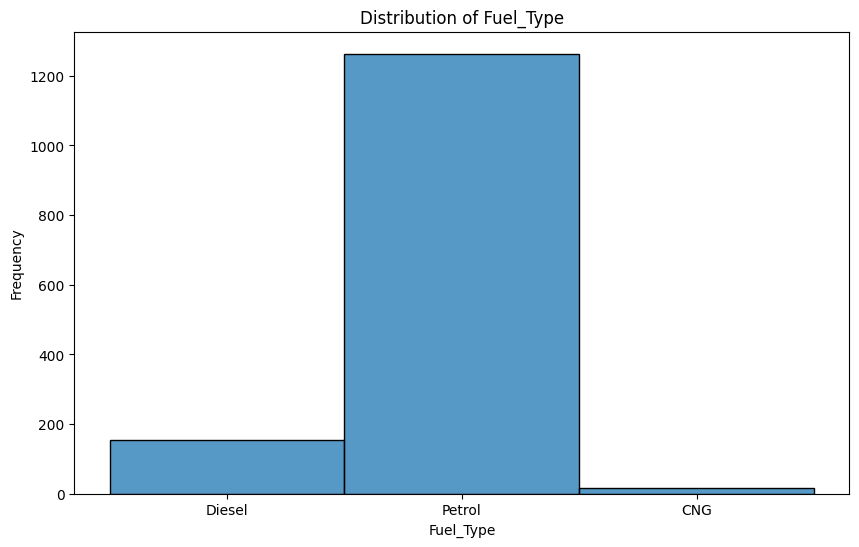

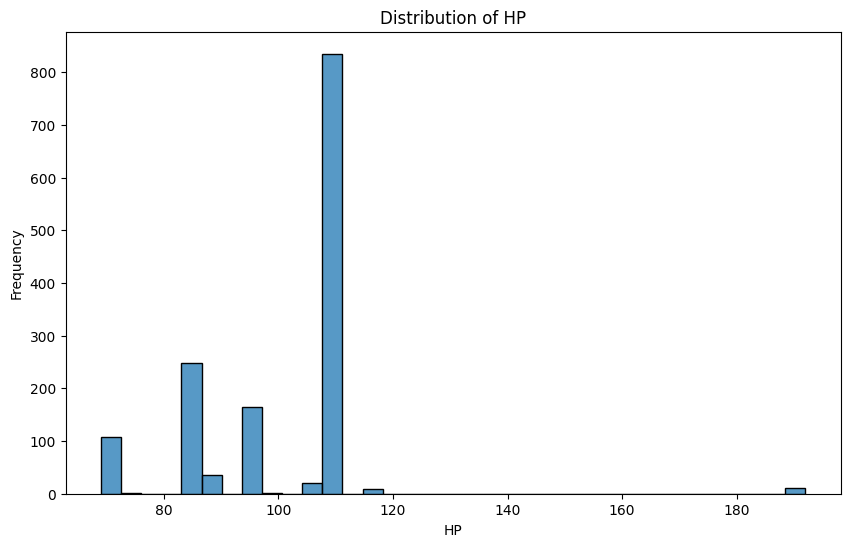

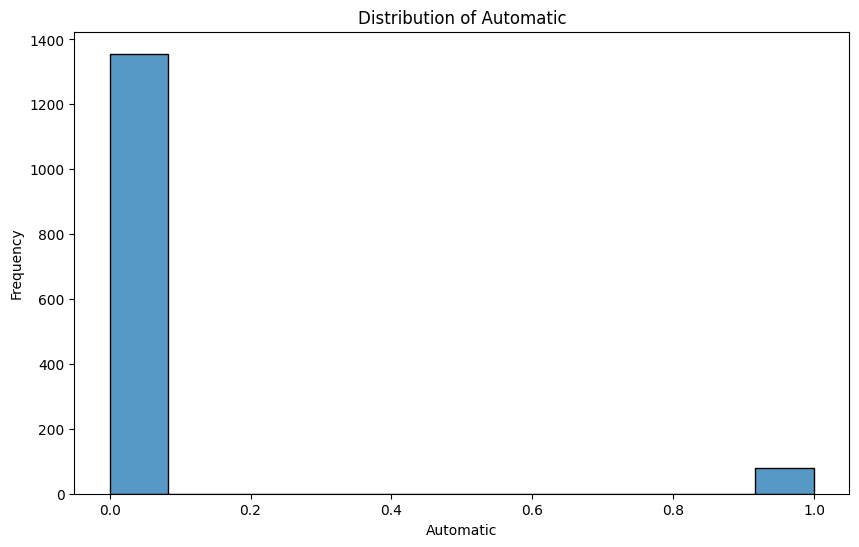

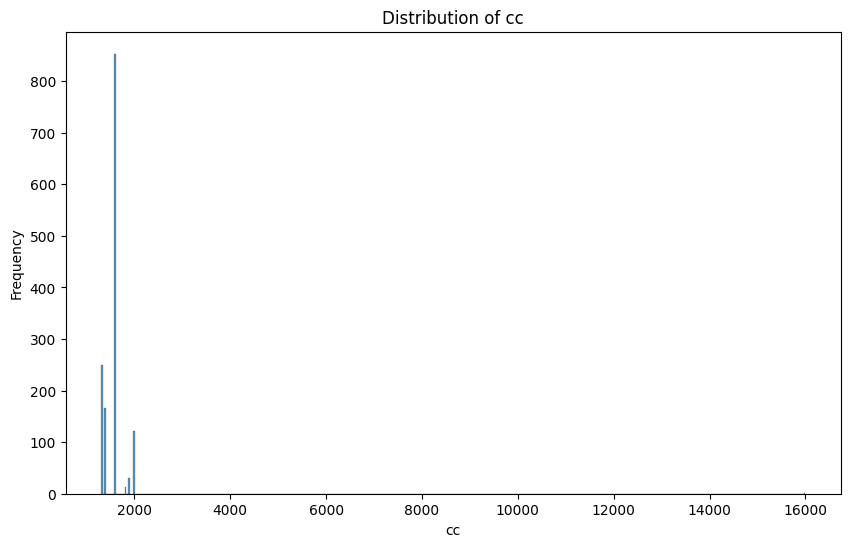

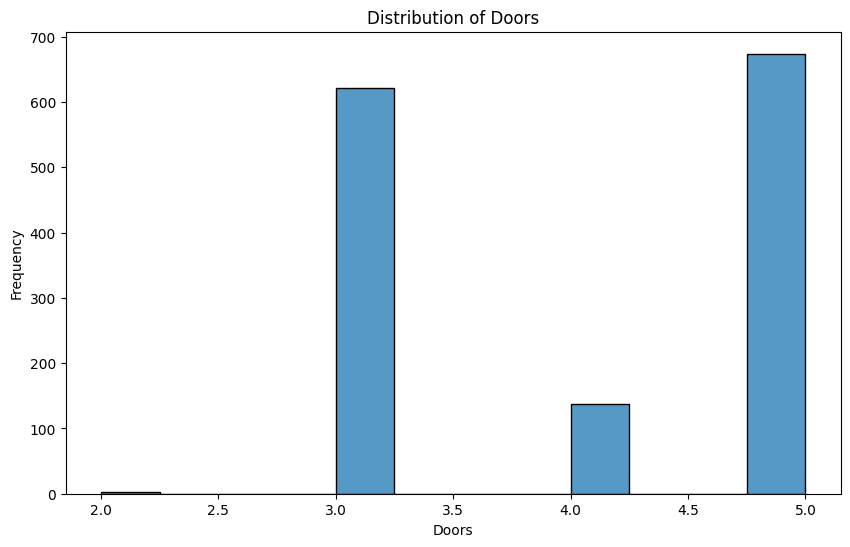

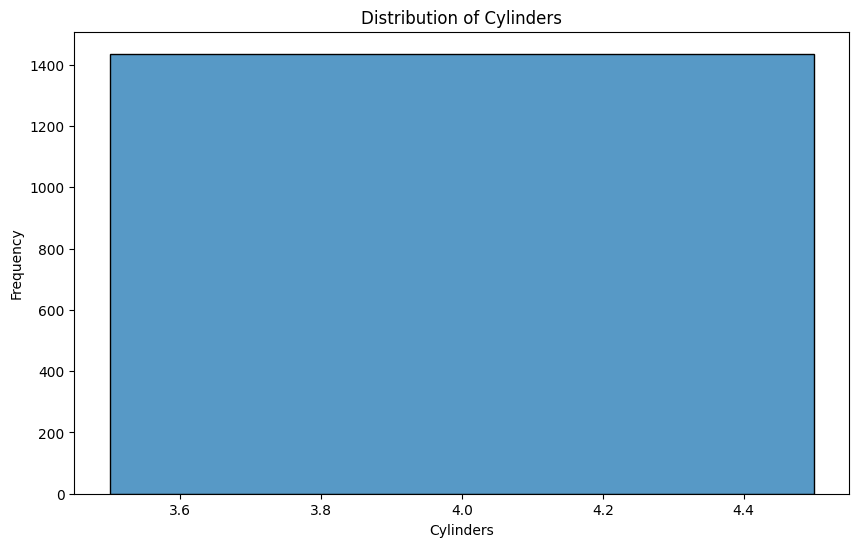

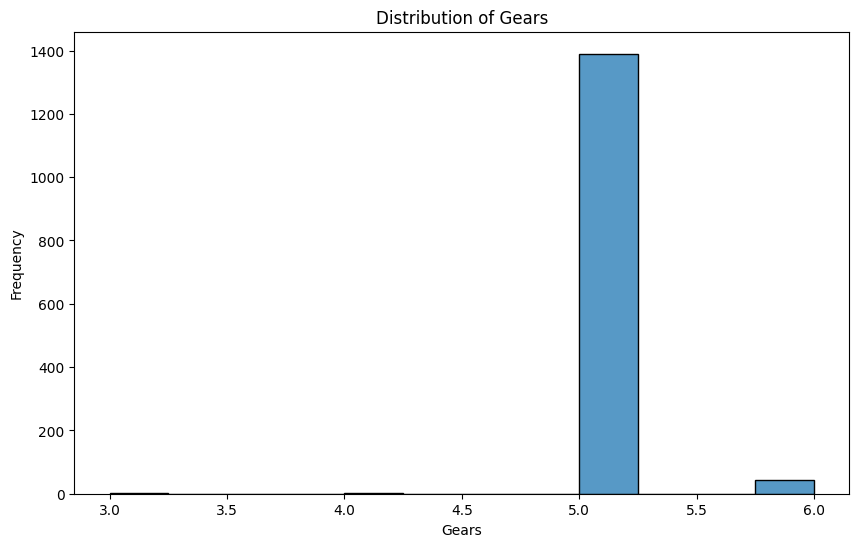

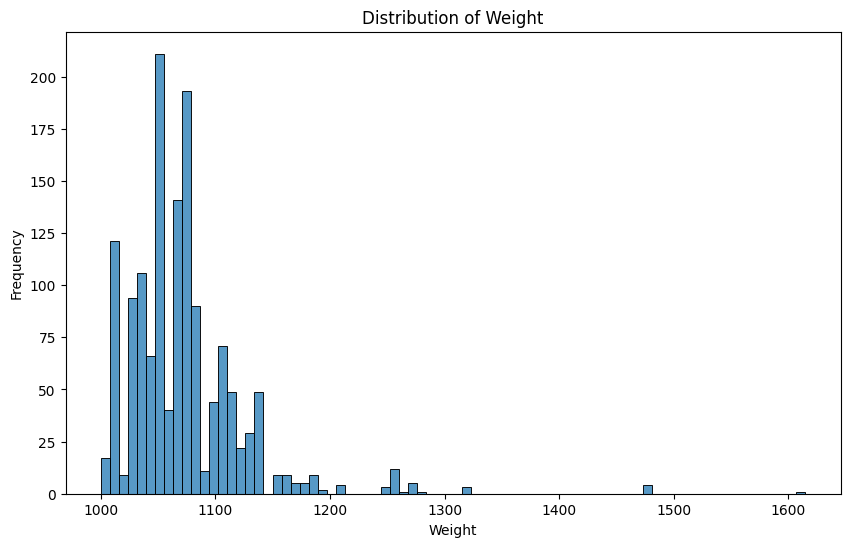

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


for col in df:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [7]:


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Fuel_Type'] = le.fit_transform(df['Fuel_Type'])
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


<Axes: >

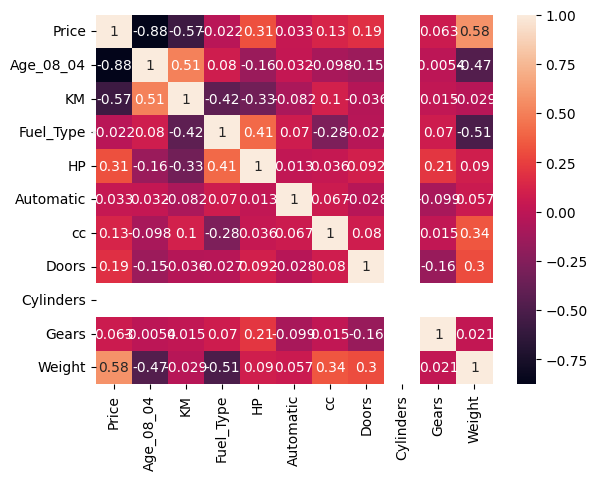

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df.describe()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,1.868384,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,0.371572,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,2.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,2.000000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,2.000000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,2.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


# Model building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score


X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:

test_accuracy_linear = []
train_accuracy_linear = []
test_accuracy_ridge = []
train_accuracy_ridge = []
test_accuracy_lasso = []
train_accuracy_lasso = []

for i in range(1, 4):
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Linear Regression
    model_linear = LinearRegression()
    model_linear.fit(X_train, y_train)
    y_test_pred_linear = model_linear.predict(X_test)
    y_train_pred_linear = model_linear.predict(X_train)

    testAccuracy_linear = r2_score(y_test, y_test_pred_linear).round(4)
    trainAccuracy_linear = r2_score(y_train, y_train_pred_linear).round(4)

    test_accuracy_linear.append(testAccuracy_linear)
    train_accuracy_linear.append(trainAccuracy_linear)

    # Ridge Regression
    model_ridge = Ridge()
    model_ridge.fit(X_train, y_train)
    y_test_pred_ridge = model_ridge.predict(X_test)
    y_train_pred_ridge = model_ridge.predict(X_train)

    testAccuracy_ridge = r2_score(y_test, y_test_pred_ridge).round(4)
    trainAccuracy_ridge = r2_score(y_train, y_train_pred_ridge).round(4)

    test_accuracy_ridge.append(testAccuracy_ridge)
    train_accuracy_ridge.append(trainAccuracy_ridge)

    # Lasso Regression
    model_lasso = Lasso()
    model_lasso.fit(X_train, y_train)
    y_test_pred_lasso = model_lasso.predict(X_test)
    y_train_pred_lasso = model_lasso.predict(X_train)

    testAccuracy_lasso = r2_score(y_test, y_test_pred_lasso).round(4)
    trainAccuracy_lasso = r2_score(y_train, y_train_pred_lasso).round(4)

    test_accuracy_lasso.append(testAccuracy_lasso)
    train_accuracy_lasso.append(trainAccuracy_lasso)


print("Linear Regression Test Accuracy:", test_accuracy_linear)
print("Linear Regression Train Accuracy:", train_accuracy_linear)
print("Ridge Regression Test Accuracy:", test_accuracy_ridge)
print("Ridge Regression Train Accuracy:", train_accuracy_ridge)
print("Lasso Regression Test Accuracy:", test_accuracy_lasso)
print("Lasso Regression Train Accuracy:", train_accuracy_lasso)

Linear Regression Test Accuracy: [0.8285, 0.8356, 0.8232]
Linear Regression Train Accuracy: [0.8602, 0.8694, 0.8706]
Ridge Regression Test Accuracy: [0.8277, 0.8357, 0.8234]
Ridge Regression Train Accuracy: [0.8602, 0.8694, 0.8706]
Lasso Regression Test Accuracy: [0.8259, 0.8359, 0.8234]
Lasso Regression Train Accuracy: [0.8602, 0.8694, 0.8706]


In [ ]:

accuracy = pd.DataFrame({'Linear Regression Test Accuracy': test_accuracy_linear,
                              'Linear Regression Train Accuracy': train_accuracy_linear,
                              'Ridge Regression Test Accuracy': test_accuracy_ridge,
                              'Ridge Regression Train Accuracy': train_accuracy_ridge,
                              'Lasso Regression Test Accuracy': test_accuracy_lasso,
                              'Lasso Regression Train Accuracy': train_accuracy_lasso},
                             index=["Modle 1", "Modle 2","Modle 3"])
accuracy


,Linear Regression Test Accuracy,Linear Regression Train Accuracy,Ridge Regression Test Accuracy,Ridge Regression Train Accuracy,Lasso Regression Test Accuracy,Lasso Regression Train Accuracy
Modle 1,0.8285,0.8602,0.8277,0.8602,0.8259,0.8602
Modle 2,0.8356,0.8694,0.8357,0.8694,0.8359,0.8694
Modle 3,0.8232,0.8706,0.8234,0.8706,0.8234,0.8706


## Interview Questions:

**1.What is Normalization & Standardization and how is it helpful?**

Normalization scales the features to a range between 0 and 1, whereas standardization scales the features so that they have mean 0 and standard deviation 1. Both techniques help in improving the performance and convergence of machine learning algorithms, especially those based on gradient descent.


**2.What techniques can be used to address multicollinearity in multiple linear regression?**



*   Remove one of the correlated variables.
*   Combine the correlated variables into a single feature.
*   Use dimensionality reduction techniques like Principal Component Analysis (PCA).
*   Regularization techniques like Lasso and Ridge regression.






